In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assessments          = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/assessments.csv')
courses              = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/courses.csv')
student_assessment   = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/studentAssessment.csv')
student_registration = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/studentRegistration.csv')

### Обзор всех датасетов
#### Overview of all datasets

In [3]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [4]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [5]:
student_assessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [6]:
student_registration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


### Слияние всех датасетов в один
#### Merge all datasets into a single dataset

In [7]:
df = assessments.merge(courses, on=['code_module', 'code_presentation'])
df

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length
0,AAA,2013J,1752,TMA,19.0,10.0,268
1,AAA,2013J,1753,TMA,54.0,20.0,268
2,AAA,2013J,1754,TMA,117.0,20.0,268
3,AAA,2013J,1755,TMA,166.0,20.0,268
4,AAA,2013J,1756,TMA,215.0,30.0,268
...,...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0,269
202,GGG,2014J,37435,TMA,61.0,0.0,269
203,GGG,2014J,37436,TMA,124.0,0.0,269
204,GGG,2014J,37437,TMA,173.0,0.0,269


In [8]:
df = df.merge(student_registration, on=['code_module', 'code_presentation'])
df

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_registration,date_unregistration
0,AAA,2013J,1752,TMA,19.0,10.0,268,11391,-159.0,NaN
1,AAA,2013J,1752,TMA,19.0,10.0,268,28400,-53.0,NaN
2,AAA,2013J,1752,TMA,19.0,10.0,268,30268,-92.0,12.0
3,AAA,2013J,1752,TMA,19.0,10.0,268,31604,-52.0,NaN
4,AAA,2013J,1752,TMA,19.0,10.0,268,32885,-176.0,NaN
...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,37444,Exam,229.0,100.0,269,2640965,-4.0,NaN
323921,GGG,2014J,37444,Exam,229.0,100.0,269,2645731,-23.0,NaN
323922,GGG,2014J,37444,Exam,229.0,100.0,269,2648187,-129.0,NaN
323923,GGG,2014J,37444,Exam,229.0,100.0,269,2679821,-49.0,101.0


In [9]:
df.id_assessment.nunique()

206

In [10]:
assessments.id_assessment.nunique()

206

In [11]:
df.id_student.nunique()

28785

In [12]:
student_registration.id_student.nunique()

28785

In [13]:
df = pd.merge(df, student_assessment[['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score']], 
              on= ['id_assessment', 'id_student'], how='left')

In [14]:
df

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_registration,date_unregistration,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,268,11391,-159.0,NaN,18.0,0.0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,268,28400,-53.0,NaN,22.0,0.0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,268,30268,-92.0,12.0,NaN,NaN,NaN
3,AAA,2013J,1752,TMA,19.0,10.0,268,31604,-52.0,NaN,17.0,0.0,72.0
4,AAA,2013J,1752,TMA,19.0,10.0,268,32885,-176.0,NaN,26.0,0.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,37444,Exam,229.0,100.0,269,2640965,-4.0,NaN,NaN,NaN,NaN
323921,GGG,2014J,37444,Exam,229.0,100.0,269,2645731,-23.0,NaN,NaN,NaN,NaN
323922,GGG,2014J,37444,Exam,229.0,100.0,269,2648187,-129.0,NaN,NaN,NaN,NaN
323923,GGG,2014J,37444,Exam,229.0,100.0,269,2679821,-49.0,101.0,NaN,NaN,NaN


#### Проверка на потерю данных
#### Data loss check

In [15]:
df.id_assessment.nunique()

206

In [16]:
assessments.id_assessment.nunique()

206

In [17]:
df.id_student.nunique()

28785

In [18]:
student_registration.id_student.nunique()

28785

### Предобработка датасета
#### Dataset preprocessing

In [15]:
df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_registration,date_unregistration,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,268,11391,-159.0,NaN,18.0,0.0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,268,28400,-53.0,NaN,22.0,0.0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,268,30268,-92.0,12.0,NaN,NaN,NaN
3,AAA,2013J,1752,TMA,19.0,10.0,268,31604,-52.0,NaN,17.0,0.0,72.0
4,AAA,2013J,1752,TMA,19.0,10.0,268,32885,-176.0,NaN,26.0,0.0,69.0


In [16]:
df.shape

(323925, 13)

In [17]:
df.dtypes

code_module                    object
code_presentation              object
id_assessment                   int64
assessment_type                object
date                          float64
weight                        float64
module_presentation_length      int64
id_student                      int64
date_registration             float64
date_unregistration           float64
date_submitted                float64
is_banked                     float64
score                         float64
dtype: object

In [18]:
df.isna().sum()

code_module                        0
code_presentation                  0
id_assessment                      0
assessment_type                    0
date                           19328
weight                             0
module_presentation_length         0
id_student                         0
date_registration                468
date_unregistration           223509
date_submitted                150013
is_banked                     150013
score                         150186
dtype: int64

## 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).

### 1. How many students successfully passed only one course? (A successful pass is at least score 40 on an exam) (7 points).

In [19]:
successful_exams = df.query("assessment_type == 'Exam' & date_submitted != 'NaN' & score >= 40") \
        .groupby('id_student', as_index=False) \
        .agg({'code_module':'count'}).sort_values(by='code_module', ascending=False)

In [20]:
successful_exams

,id_student,code_module
2048,592093,2
755,445917,2
1303,543788,2
1881,582879,2
769,447644,2
...,...,...
1398,551814,1
1399,552003,1
1400,552114,1
1401,552166,1


In [21]:
successful_exams.query("code_module == 1").code_module.sum()

3802

### Ответ: 3802
#### Answer: 3802

## 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (10 баллов)

### 2. Identify the hardest and easiest exam: find the courses and exams within the course that have the lowest and highest completion rates*. (10 points)

#### завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
#### completion rate = number of successful exams / number of all exam attempts

In [22]:
exams = df.query("assessment_type == 'Exam' & date_submitted != 'NaN'") \
        .groupby(['code_module' , 'code_presentation'], as_index=False) \
        .agg({'assessment_type':'count'})

exams = exams.rename(columns={"assessment_type": "all_exams"})
exams

,code_module,code_presentation,all_exams
0,CCC,2014B,747
1,CCC,2014J,1168
2,DDD,2013B,602
3,DDD,2013J,968
4,DDD,2014B,524
5,DDD,2014J,950


In [23]:
passed_exams = df.query("assessment_type == 'Exam' & date_submitted != 'NaN' & score >= 40") \
        .groupby(['code_module' , 'code_presentation'], as_index=False) \
        .agg({'assessment_type':'count'})

passed_exams = passed_exams.rename(columns={"assessment_type": "passed_exams"})
passed_exams

,code_module,code_presentation,passed_exams
0,CCC,2014B,664
1,CCC,2014J,1019
2,DDD,2013B,504
3,DDD,2013J,878
4,DDD,2014B,485
5,DDD,2014J,842


In [24]:
exams_main = exams.merge(passed_exams, on=['code_module', 'code_presentation'])
exams_main['completeness'] = exams_main.passed_exams / exams_main.all_exams
exams_main.sort_values(by='completeness', ascending=False)

,code_module,code_presentation,all_exams,passed_exams,completeness
4,DDD,2014B,524,485,0.925573
3,DDD,2013J,968,878,0.907025
0,CCC,2014B,747,664,0.888889
5,DDD,2014J,950,842,0.886316
1,CCC,2014J,1168,1019,0.872432
2,DDD,2013B,602,504,0.837209


### Ответ: самый сложный экзамен (самая низкая завершаемость) = предмет: DDD, семестр: 2013B
### // самый простой экзамен (самая высокая завершаемость) = предмет: DDD, семестр: 2014B
#### Answer: hardest exam (lowest completion rate) = subject: DDD, semester: 2013B
#### // easiest exam (highest completion rate) = subject: DDD, semester: 2014B

## 3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (7 баллов) 
### 3. For each course, determine the average time to pass the exams (by pass, we mean the last time the student successfully passed the exam). (7 points) 

In [25]:
df.query("assessment_type == 'Exam' & date_submitted != 'NaN' & score >= 40") \
        .groupby(['code_module', 'code_presentation'], as_index=False) \
        .agg({'date_submitted':'mean'})

,code_module,code_presentation,date_submitted
0,CCC,2014B,231.581325
1,CCC,2014J,244.404318
2,DDD,2013B,230.164683
3,DDD,2013J,239.509112
4,DDD,2014B,234.936082
5,DDD,2014J,242.804038


### Ответ: В вышеизложенной таблице можно увидеть средний срок сдачи экзаменов для каждого из предметов
#### ### Answer: In the above table, you can see the average due date for each of the exams for each subject

## 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)

### 4. Identify the most popular subjects (TOP-3) by the number of registrations for them. And also the subjects with the highest churn rate (top 3). (8 points)

In [26]:
registrations = df.query("date_registration != 'NaN'") \
        .groupby(['code_module', 'code_presentation'], as_index=False) \
        .agg({'date_registration':'count'})

registrations = registrations.rename(columns={"date_registration": "number_of_registrations"})
registrations

,code_module,code_presentation,number_of_registrations
0,AAA,2013J,2298
1,AAA,2014J,2190
2,BBB,2013B,21192
3,BBB,2013J,26820
4,BBB,2014B,19296
5,BBB,2014J,13746
6,CCC,2014B,19310
7,CCC,2014J,24950
8,DDD,2013B,18186
9,DDD,2013J,13531


In [27]:
unregistrations = df.query("date_unregistration != 'NaN'") \
        .groupby(['code_module', 'code_presentation'], as_index=False) \
        .agg({'date_unregistration':'count'})

unregistrations = unregistrations.rename(columns={"date_unregistration": "number_of_unregistrations"})
unregistrations

,code_module,code_presentation,number_of_unregistrations
0,AAA,2013J,360
1,AAA,2014J,396
2,BBB,2013B,6060
3,BBB,2013J,7764
4,BBB,2014B,5868
5,BBB,2014J,4416
6,CCC,2014B,8980
7,CCC,2014J,10490
8,DDD,2013B,6034
9,DDD,2013J,4788


In [28]:
churn_rate = registrations.merge(unregistrations, on=['code_module', 'code_presentation'])
churn_rate['churn_rate'] = (churn_rate.number_of_unregistrations / churn_rate.number_of_registrations)
churn_rate.churn_rate = churn_rate.churn_rate.apply('{:.2%}'.format)

churn_rate

,code_module,code_presentation,number_of_registrations,number_of_unregistrations,churn_rate
0,AAA,2013J,2298,360,15.67%
1,AAA,2014J,2190,396,18.08%
2,BBB,2013B,21192,6060,28.60%
3,BBB,2013J,26820,7764,28.95%
4,BBB,2014B,19296,5868,30.41%
5,BBB,2014J,13746,4416,32.13%
6,CCC,2014B,19310,8980,46.50%
7,CCC,2014J,24950,10490,42.04%
8,DDD,2013B,18186,6034,33.18%
9,DDD,2013J,13531,4788,35.39%


### Ответ: самые популярные предметы (ТОП-3) по количеству регистраций на них – FFF 2014J , FFF 2013J, BBB 2013J
### // предметы с самым большим оттоком (ТОП-3) – CCC 2014B, CCC 2014J, DDD 2014B
#### Answer: the most popular subjects (top 3) by number of registrations are FFF 2014J , FFF 2013J, BBB 2013J
#### // subjects with the highest churn rate (top 3) - CCC 2014B, CCC 2014J, DDD 2014B

## 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  (15 баллов) 
### 5. Using pandas, between the beginning of 2013 and the end of 2014, identify the semester with the lowest course completions and the longest average course deadlines.  (15 points) 

In [29]:
submitted_mean = df.query("date_submitted != 'NaN' & assessment_type == 'Exam' & score >= 40") \
        .groupby(['code_module' , 'code_presentation'], as_index=False) \
        .agg({'date_submitted':'mean'})

submitted_mean

,code_module,code_presentation,date_submitted
0,CCC,2014B,231.581325
1,CCC,2014J,244.404318
2,DDD,2013B,230.164683
3,DDD,2013J,239.509112
4,DDD,2014B,234.936082
5,DDD,2014J,242.804038


In [30]:
completeness_and_mean_submitted = submitted_mean.merge(exams_main, on=['code_module', 'code_presentation'])
completeness_and_mean_submitted.completeness = completeness_and_mean_submitted.completeness.apply('{:.2%}'.format)
completeness_and_mean_submitted

,code_module,code_presentation,date_submitted,all_exams,passed_exams,completeness
0,CCC,2014B,231.581325,747,664,88.89%
1,CCC,2014J,244.404318,1168,1019,87.24%
2,DDD,2013B,230.164683,602,504,83.72%
3,DDD,2013J,239.509112,968,878,90.70%
4,DDD,2014B,234.936082,524,485,92.56%
5,DDD,2014J,242.804038,950,842,88.63%


### Ответ: если вопрос подразумевает два одновременных условия, то однозначного варианта нет, самый близкий к идеальному вариант – это CCC 2014J, так как у него самый долгий средний срок сдачи и вторая по низкости завершаемость
### // если в вопросе подразумеваются отдельные ответы, то самый долгий средний срок сдачи у CCC 2014J, а самая низкая завершаемость у DDD 2013B
### // можно также предположить, что CCC 2014J сложный курс, а DDD 2013B не такой сложный, так как средний срок сдачи меньше, но менее интересный, так как завершаемость ниже

#### Answer: if the question implies two simultaneous conditions, there is no clear-cut option, the closest to the ideal option is CCC 2014J because it has the longest average completion time and the second lowest completion rate
#### // if the question assumes separate answers, then CCC 2014J has the longest average turnaround time and DDD 2013B has the lowest completion rate.
#### // you can also assume that CCC 2014J is a challenging course and DDD 2013B is not as challenging because the average time to complete is shorter, but is less interesting because the completion rate is lower.

## 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Описание подхода можно найти тут. (23 балла)

### 6. Often, segmentation-based approaches are used for qualitative audience analysis. Using python, build adapted RFM clusters of students to qualitatively assess your audience. In the adapted clustering, you can choose the following metrics: R is the average time per exam, F is the course completion rate, and M is the average number of points received per exam. Describe in detail how you created the clusters. For each RFM segment, construct recency, frequency, and monetary metric bounds to interpret these clusters. A description of the approach can be found here. (23 points)

### R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. 

#### R is the average passing time of exam, F is the course completion rate, and M is the average number of points received per exam. 

In [31]:
pre_rfm = df.query("date_submitted != 'NaN' & assessment_type == 'Exam' & score >= 40") \
            .groupby(['code_module', 'code_presentation', 'id_student'], as_index=False) \
            .agg({'date_submitted':'mean', 'score':'mean'})
pre_rfm

,code_module,code_presentation,id_student,date_submitted,score
0,CCC,2014B,29764,230.0,94.0
1,CCC,2014B,29820,230.0,76.0
2,CCC,2014B,40604,234.0,66.0
3,CCC,2014B,42638,230.0,50.0
4,CCC,2014B,46605,230.0,98.0
...,...,...,...,...,...
4387,DDD,2014J,2677210,243.0,71.0
4388,DDD,2014J,2678380,242.0,64.0
4389,DDD,2014J,2684043,243.0,69.0
4390,DDD,2014J,2685863,243.0,49.0


In [32]:
RFM = pd.merge(pre_rfm, exams_main[['code_module', 'code_presentation', 'completeness']], 
               on=['code_module', 'code_presentation'], how='left')
RFM

,code_module,code_presentation,id_student,date_submitted,score,completeness
0,CCC,2014B,29764,230.0,94.0,0.888889
1,CCC,2014B,29820,230.0,76.0,0.888889
2,CCC,2014B,40604,234.0,66.0,0.888889
3,CCC,2014B,42638,230.0,50.0,0.888889
4,CCC,2014B,46605,230.0,98.0,0.888889
...,...,...,...,...,...,...
4387,DDD,2014J,2677210,243.0,71.0,0.886316
4388,DDD,2014J,2678380,242.0,64.0,0.886316
4389,DDD,2014J,2684043,243.0,69.0,0.886316
4390,DDD,2014J,2685863,243.0,49.0,0.886316


### Пояснение: у некоторых студентов пройдено 2 курса и соответственно они имеют две оценки за экзамен, два средних срока сдачи и два средних показателя завершаемости, для этого в итогом (нижнем RFM-датафрейме) были взяты средние показатели из двух результатов (для date_submitted, score, completeness)

#### Explanation: some students have taken 2 courses and consequently have two exam grades, two average due dates and two average completion rates, for this purpose the average of the two results (for date_submitted, score, completeness) was taken in the total (lower RFM-dataframe)

In [33]:
RFM = RFM.groupby('id_student', as_index=False) \
        .agg({'date_submitted':'mean', 'score':'mean', 'completeness':'mean'})
RFM = RFM.rename(columns={'date_submitted': 'R (mean_submitted_time)', 'completeness':'F (completeness)', 'score':'M (mean_score)'})
RFM = RFM.reindex(columns=['id_student', 'R (mean_submitted_time)', 'F (completeness)', 'M (mean_score)'])
RFM

,id_student,R (mean_submitted_time),F (completeness),M (mean_score)
0,23698,243.0,0.872432,80.0
1,24213,236.0,0.925573,58.0
2,27116,243.0,0.872432,96.0
3,28046,237.0,0.907025,40.0
4,28787,243.0,0.872432,44.0
...,...,...,...,...
4092,2694886,236.0,0.925573,69.0
4093,2694933,230.0,0.837209,73.0
4094,2695608,237.0,0.907025,73.0
4095,2697181,230.0,0.888889,80.0


### Распределение сегментов

#### Чем показатель R ниже – тем лучше, чем показатели F и M выше – тем лучше, поэтому потребовалось два разных кода
#### Показатели были поделены на 5 блоков с помощью разделения по квантилям (шаг – 0.2 соответственно)

### Segment distribution

#### The lower the R score the better, the higher the F and M scores the better, so two different codes were required.
#### The indicators were divided into 5 blocks by quantile division (step - 0.2 respectively).

In [34]:
quintiles = RFM[['R (mean_submitted_time)', 'F (completeness)', 'M (mean_score)']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'R (mean_submitted_time)': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5},
 'F (completeness)': {0.2: 0.872431506849315,
  0.4: 0.8863157894736842,
  0.6: 0.8888888888888888,
  0.8: 0.9070247933884298},
 'M (mean_score)': {0.2: 53.0, 0.4: 64.0, 0.6: 74.79999999999995, 0.8: 87.0}}

In [35]:
def r_score(x):
    if x <= quintiles['R (mean_submitted_time)'][.2]:
        return 5
    elif x <= quintiles['R (mean_submitted_time)'][.4]:
        return 4
    elif x <= quintiles['R (mean_submitted_time)'][.6]:
        return 3
    elif x <= quintiles['R (mean_submitted_time)'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [36]:
RFM['R'] = RFM['R (mean_submitted_time)'].apply(lambda x: r_score(x))
RFM['F'] = RFM['F (completeness)'].apply(lambda x: fm_score(x, 'F (completeness)'))
RFM['M'] = RFM['M (mean_score)'].apply(lambda x: fm_score(x, 'M (mean_score)'))

In [37]:
RFM['RFM Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM

,id_student,R (mean_submitted_time),F (completeness),M (mean_score),R,F,M,RFM Score
0,23698,243.0,0.872432,80.0,2,1,4,214
1,24213,236.0,0.925573,58.0,4,5,2,452
2,27116,243.0,0.872432,96.0,2,1,5,215
3,28046,237.0,0.907025,40.0,4,4,1,441
4,28787,243.0,0.872432,44.0,2,1,1,211
...,...,...,...,...,...,...,...,...
4092,2694886,236.0,0.925573,69.0,4,5,3,453
4093,2694933,230.0,0.837209,73.0,5,1,3,513
4094,2695608,237.0,0.907025,73.0,4,4,3,443
4095,2697181,230.0,0.888889,80.0,5,3,4,534


### Определение групп сегментов // интерпретация кластеров
#### Для определения сегментов было решено использовать два показателя M (среднее количество баллов) и R (средний срок сдачи) для более логичного распределения на сегменты по степени успеваемости 

### Defining groups of segments // interpreting clusters
#### To define the segments, it was decided to use two indicators M (mean score) and R (mean time to pass) to more logically categorize into segments by grade level 

In [38]:
segt_map = {
    r'[1-2][1-2]': 'неготовые',
    r'[1-2][3-4]': 'ниже средней успеваемости',
    r'[1-2]5': 'поверхностные',
    r'[3-4][1-2]': 'средняя успеваемость',
    r'[3-4][3-4]': 'средняя успеваемость',
    r'[3-4][5]': 'выше средней успеваемости',
    r'[5][1-2]': 'совмещающие с другой деятельностью',
    r'[5][3-4]': 'выше средней успеваемости',
    r'55': 'гении'
    
}

RFM['Segment'] = RFM['M'].map(str) + RFM['R'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM

,id_student,R (mean_submitted_time),F (completeness),M (mean_score),R,F,M,RFM Score,Segment
0,23698,243.0,0.872432,80.0,2,1,4,214,средняя успеваемость
1,24213,236.0,0.925573,58.0,4,5,2,452,ниже средней успеваемости
2,27116,243.0,0.872432,96.0,2,1,5,215,совмещающие с другой деятельностью
3,28046,237.0,0.907025,40.0,4,4,1,441,ниже средней успеваемости
4,28787,243.0,0.872432,44.0,2,1,1,211,неготовые
...,...,...,...,...,...,...,...,...,...
4092,2694886,236.0,0.925573,69.0,4,5,3,453,средняя успеваемость
4093,2694933,230.0,0.837209,73.0,5,1,3,513,выше средней успеваемости
4094,2695608,237.0,0.907025,73.0,4,4,3,443,средняя успеваемость
4095,2697181,230.0,0.888889,80.0,5,3,4,534,выше средней успеваемости


### Визуализация количества представителей каждого сегмента

#### Visualization of the number of representatives of each segment

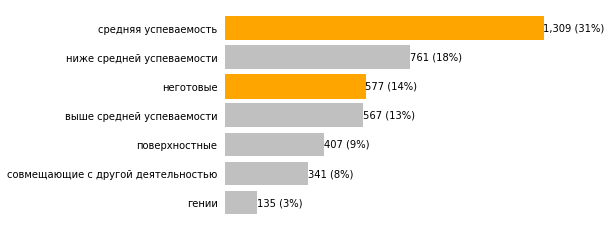

In [39]:
segments_counts = RFM['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['средняя успеваемость', 'неготовые']:
            bar.set_color('orange')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

### Продуктовые рекомендации для каждого сегмента

#### Product recommendations for each segment

Средняя успеваемость – поддержание уровня качества продукта

Ниже средней успеваемости – опросы в общем чате насчет прогресса учеников, сообщения в личный чат с вопросом о прогрессе, прикрепление личного ментора

Неготовые – опросы в общем чате насчет прогресса учеников, сообщения в личный чат с вопросом о прогрессе, прикрепление личного ментора + предложение пройти pre-requisite курс с сохранением текущего курса

Выше средней успеваемости – дополнительные кейсы, дополнительные уроки для профессионального развития, предложения о более сложных программах

Поверхностные – добавить промежуточные самостоятельные проекты для более глубокого погружения в курс

Совмещающие с другой деятельностью – опция более продолжительных дедлайнов, но с уменьшением количества баллов

Гении – дополнительные кейсы, дополнительные уроки для профессионального развития, предложения о более сложных программах + участие в бета-тестированиях более сложных программ